In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
path1 = '/local/rcs/yunyun/MAE-pytorch/output/mae_finetune_model/log.txt'
path2 = '/local/rcs/yunyun/MAE-pytorch/output/mae_tfl_model/log.txt'
path3 = '/local/rcs/yunyun/MAE-pytorch/output/mae_tfl_mlp_model/log.txt'
path4 = '/local/rcs/yunyun/MAE-pytorch/output/vit_finetune_model/log.txt'
path5 = '/local/rcs/yunyun/MAE-pytorch/output/mae_small_finetune_model/log.txt'

def read_result(path):
    test_acc_top1 = []
    test_acc_top5 = []
    loss = []
    with open(path) as f:
        for lines in f:
            s = lines.strip().split(",")
            epoch = int(s[9].strip().split(":")[1])
            loss.append(float(s[6].strip().split(":")[1].replace(" ", "")))
            if epoch==0 or (epoch+1) % 20 == 0:
                test_acc_top1.append(float(s[7].strip().split(":")[1].replace(" ", "")))
                test_acc_top5.append(float(s[8].strip().split(":")[1].replace(" ", "")))
    return loss, [test_acc_top1, test_acc_top5]


loss1, mae_finetune_result = read_result(path1)
loss2, mae_tfl_result = read_result(path2)
loss3, mae_tfl_mlp_result = read_result(path3)
loss4, vit_finetune_result = read_result(path4)
loss1_1, mae_small_result = read_result(path5)
print(mae_finetune_result[0])

[15.894139163231735, 59.36004955802808, 67.03050436357562, 69.79665228738739, 71.90490632764461, 72.71232269141092]


In [46]:
def read_result2(path):
    test_acc_top1 = []
    test_acc_top5 = []
    loss = []
    with open(path) as f:
        for lines in f:
            s = lines.strip().split(",")
            epoch = int(s[10].strip().split(":")[1])
            loss.append(float(s[7].strip().split(":")[1].replace(" ", "")))
            if epoch==0 or (epoch+1) % 10 == 0:
                test_acc_top1.append(float(s[8].strip().split(":")[1].replace(" ", "")))
                test_acc_top5.append(float(s[9].strip().split(":")[1].replace(" ", "")))
    return loss, [test_acc_top1, test_acc_top5]

path5 = '/local/rcs/yunyun/MAE-pytorch/output/resnet50_finetune_model/log.txt'
path6 = '/local/rcs/yunyun/MAE-pytorch/output/sqznet_finetune_model/log.txt'
path7 = '/local/rcs/yunyun/MAE-pytorch/output/vgg_finetune_model/log.txt'

loss5, resnet_finetune_result = read_result2(path5)
loss6, sqznet_finetune_result = read_result2(path6)
loss7, vgg_finetune_result = read_result2(path7)



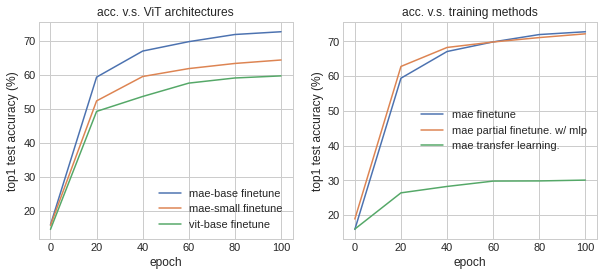

Method | top1 best acc | top5 best acc
------------------------------
mae finetune | 72.71 | 96.49
vit finetune | 59.72 | 89.50
mae transfer | 30.07 | 65.25
mae partial finetune w/ mlp | 72.11 | 96.32


In [47]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
x = [0, 20, 40, 60, 80, 100]
plt.title('acc. v.s. ViT architectures')
plt.plot(x, mae_finetune_result[0], label="mae-base finetune")
plt.plot(x, mae_small_result[0], label="mae-small finetune")
plt.plot(x, vit_finetune_result[0], label="vit-base finetune")
plt.ylabel('top1 test accuracy (%)')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
x = [0, 20, 40, 60, 80, 100]
plt.title('acc. v.s. training methods')
plt.plot(x, mae_finetune_result[0], label="mae finetune")
plt.plot(x, mae_tfl_mlp_result[0], label="mae partial finetune. w/ mlp")
plt.plot(x, mae_tfl_result[0], label="mae transfer learning.")
# plt.plot(x, vit_finetune_result[0], label="vit finetune")
plt.ylabel('top1 test accuracy (%)')
plt.xlabel('epoch')
plt.legend()
plt.show()

print("Method | top1 best acc | top5 best acc")
print("---"*10)
print("mae finetune | {:.2f} | {:.2f}".format(np.max(mae_finetune_result[0]), np.max(mae_finetune_result[1])))
print("vit finetune | {:.2f} | {:.2f}".format(np.max(vit_finetune_result[0]), np.max(vit_finetune_result[1])))
print("mae transfer | {:.2f} | {:.2f}".format(np.max(mae_tfl_result[0]), np.max(mae_tfl_result[1])))
print("mae partial finetune w/ mlp | {:.2f} | {:.2f}".format(np.max(mae_tfl_mlp_result[0]), np.max(mae_tfl_mlp_result[1])))

      

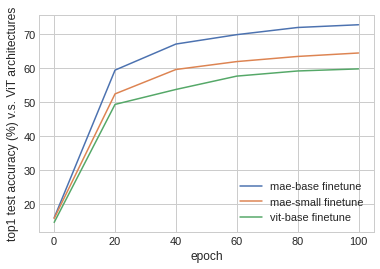

In [48]:
fig = plt.figure()
ax = plt.axes()

x = [0, 20, 40, 60, 80, 100]
ax.plot(x, mae_finetune_result[0], label="mae-base finetune")
ax.plot(x, mae_small_result[0], label="mae-small finetune")
ax.plot(x, vit_finetune_result[0], label="vit-base finetune")
plt.ylabel('top1 test accuracy (%) v.s. ViT architectures')
plt.xlabel('epoch')
plt.legend()
plt.show()

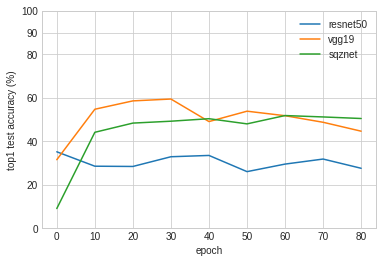

Method | top1 best acc | top5 best acc
------------------------------
resnet50 finetune | 35.18 | 72.08
vgg19 finetune | 59.45 | 91.45
sqznet transfer | 51.85 | 86.83


In [14]:
fig = plt.figure()
ax = plt.axes()

x = [0, 10, 20, 30, 40, 50, 60, 70, 80]
ax.plot(x, resnet_finetune_result[0][:-2], label="resnet50")
ax.plot(x, vgg_finetune_result[0][:-1], label="vgg19")
ax.plot(x, sqznet_finetune_result[0][:-2], label="sqznet")
plt.ylabel('top1 test accuracy (%)')
plt.yticks([0,20,40,60,80, 90, 100])
plt.xlabel('epoch')
plt.legend()
plt.show()

print("Method | top1 best acc | top5 best acc")
print("---"*10)
print("resnet50 finetune | {:.2f} | {:.2f}".format(np.max(resnet_finetune_result[0]), np.max(resnet_finetune_result[1])))
print("vgg19 finetune | {:.2f} | {:.2f}".format(np.max(vgg_finetune_result[0]), np.max(vgg_finetune_result[1])))
print("sqznet transfer | {:.2f} | {:.2f}".format(np.max(sqznet_finetune_result[0]), np.max(sqznet_finetune_result[1])))


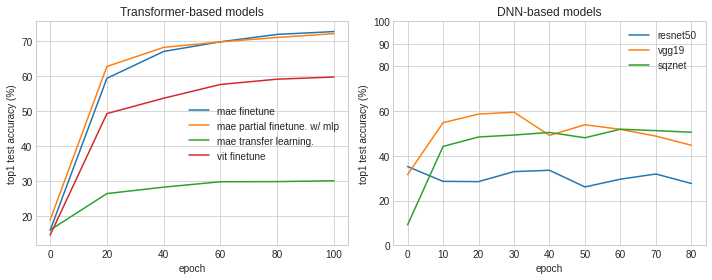

In [15]:
plt.figure(figsize=(10,4))


plt.subplot(1, 2, 1)

x = [0, 20, 40, 60, 80, 100]
plt.title('Transformer-based models')
plt.plot(x, mae_finetune_result[0], label="mae finetune")
plt.plot(x, mae_tfl_mlp_result[0], label="mae partial finetune. w/ mlp")
plt.plot(x, mae_tfl_result[0], label="mae transfer learning.")
plt.plot(x, vit_finetune_result[0], label="vit finetune")
plt.ylabel('top1 test accuracy (%)')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)

x = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.title('DNN-based models')
plt.plot(x, resnet_finetune_result[0][:-2], label="resnet50")
plt.plot(x, vgg_finetune_result[0][:-1], label="vgg19")
plt.plot(x, sqznet_finetune_result[0][:-2], label="sqznet")
plt.ylabel('top1 test accuracy (%)')
plt.yticks([0,20,40,60,80, 90, 100])
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

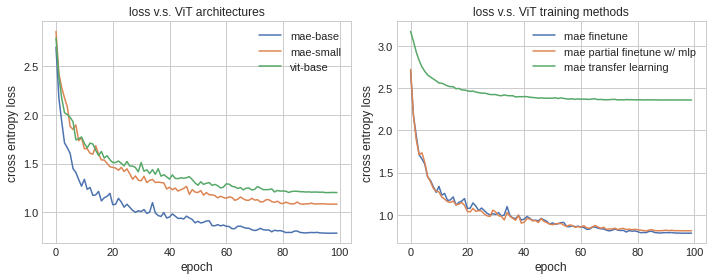

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)

x = np.arange(100)
plt.plot(x, loss1, label="mae-base")
plt.plot(x, loss1_1, label="mae-small")
# ax.plot(x, loss3, label="mae partial finetune w/ mlp")
# ax.plot(x, loss2, label="mae transfer learning")
plt.plot(x, loss4, label="vit-base")
plt.title('loss v.s. ViT architectures')
plt.ylabel('cross entropy loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)

x = np.arange(100)
plt.plot(x, loss1, label="mae finetune")
# ax.plot(x, loss1_1, label="mae-small finetune")
plt.plot(x, loss3, label="mae partial finetune w/ mlp")
plt.plot(x, loss2, label="mae transfer learning")
# ax.plot(x, loss4, label="vit-base finetune")
plt.title('loss v.s. ViT training methods')
plt.ylabel('cross entropy loss')
plt.xlabel('epoch')

plt.legend()
plt.tight_layout()
plt.show()


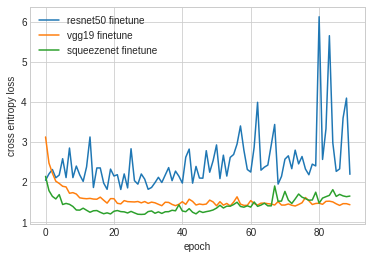

In [8]:
fig = plt.figure()
ax = plt.axes()

x = np.arange(90)
ax.plot(x, loss5[:90], label="resnet50 finetune")
ax.plot(x, loss6[:90], label="vgg19 finetune")
ax.plot(x, loss7[:90], label="squeezenet finetune")
plt.ylabel('cross entropy loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

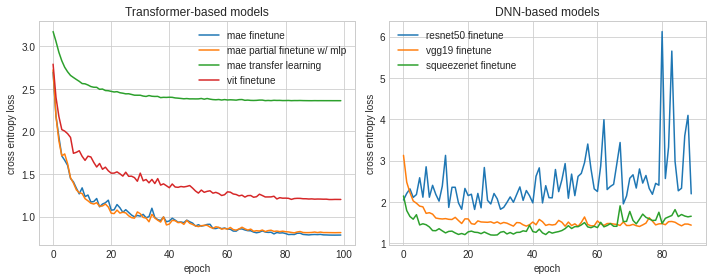

In [9]:
plt.figure(figsize=(10,4))


plt.subplot(1, 2, 1)

plt.title('Transformer-based models')
x = np.arange(100)
plt.plot(x, loss1, label="mae finetune")
plt.plot(x, loss3, label="mae partial finetune w/ mlp")
plt.plot(x, loss2, label="mae transfer learning")
plt.plot(x, loss4, label="vit finetune")
plt.ylabel('cross entropy loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)

plt.title('DNN-based models')
x = np.arange(90)
plt.plot(x, loss5[:90], label="resnet50 finetune")
plt.plot(x, loss6[:90], label="vgg19 finetune")
plt.plot(x, loss7[:90], label="squeezenet finetune")
plt.ylabel('cross entropy loss')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns; 
sns.set_theme()
from sklearn.metrics import accuracy_score


In [28]:
def group_label_func(y_label):
    group_y = np.zeros_like(y_label)
    for i in range(len(y_label)):
        y = y_label[i]
        if y==0:
            group_y[i] = 0 
        elif y==1 or y==2 or y==3 or y==4:
            group_y[i] = 1
        elif y==5 or y==6 or y==7 or y==8:
            group_y[i] = 2
        elif y==9:
            group_y[i] = 3
        elif y==10 or y==11:
            group_y[i] = 4
        elif y==12 or y==13 or y==14 or y==15:
            group_y[i] = 5
        elif y==16:
            group_y[i] = 6
        elif y==17 or y==18 or y==19 or y==20 or y==21:
            group_y[i] = 7
        elif y==22:
            group_y[i] = 8
        elif y==23:
            group_y[i] = 9
        elif y==24:
            group_y[i] = 10
    return group_y

In [33]:
def cal_group_acc(method, path):
    ytrue, ypred = np.load(path, allow_pickle=True)
    ypred_label = [torch.argmax(y).item() for batch in ypred for y in batch ]
    ytrue_label = [y.item() for batch in ytrue for y in batch]
    conf_matrix = confusion_matrix(ytrue_label, ypred_label, labels=np.arange(25))

    group_ytrue = group_label_func(ytrue_label)
    group_ypred = group_label_func(ypred_label)

    print('{} | {:.2f}% | {:.2f}%'.format(method, accuracy_score(ytrue_label, ypred_label)*100, accuracy_score(group_ytrue, group_ypred)*100))
    return group_ytrue, group_ypred
    
print("Method | 25 classes Top 1 | 10 classes group Top 1")
print('----'*10)
_, _ = cal_group_acc('mae-base finetune', './mae_finetune_model/advpred.npy')
_, _ = cal_group_acc('mae-small finetune', './mae_small_finetune_model/pred.npy')
_, _ = cal_group_acc('mae-base partial', './mae_tfl_mlp_model/advpred.npy')
_, _ = cal_group_acc('mae-base transfer', './mae_tfl_model/advpred.npy')
_, _ = cal_group_acc('ViT-base finetune', './vit_finetune_model/advpred.npy')
print('----'*10)
_, _ = cal_group_acc('ResNet50 finetune', './resnet50_finetune_model/advpred.npy')
_, _ = cal_group_acc('Vgg19 finetune', './vgg_finetune_model/advpred.npy')
_, _ = cal_group_acc('SqueezeNet finetune', './sqznet_finetune_model/advpred.npy')
print('----'*10)

Method | 25 classes Top 1 | 10 classes group Top 1
----------------------------------------
mae-base finetune | 72.68% | 89.19%
mae-small finetune | 64.35% | 80.65%
mae-base partial | 72.19% | 87.98%
mae-base transfer | 30.07% | 43.60%
ViT-base finetune | 59.66% | 75.09%
----------------------------------------
ResNet50 finetune | 38.71% | 56.29%
Vgg19 finetune | 59.45% | 78.50%
SqueezeNet finetune | 52.96% | 69.06%
----------------------------------------


mae finetune | 72.68% | 89.19%


[Text(0.5, 0, 'clean'),
 Text(1.5, 0, 'FGSM'),
 Text(2.5, 0, 'HopSkipJump'),
 Text(3.5, 0, 'Patch'),
 Text(4.5, 0, 'U-PGD'),
 Text(5.5, 0, 'PGD'),
 Text(6.5, 0, 'Deepfool'),
 Text(7.5, 0, 'CW'),
 Text(8.5, 0, 'Jsma'),
 Text(9.5, 0, 'Prgf'),
 Text(10.5, 0, 'Gap')]

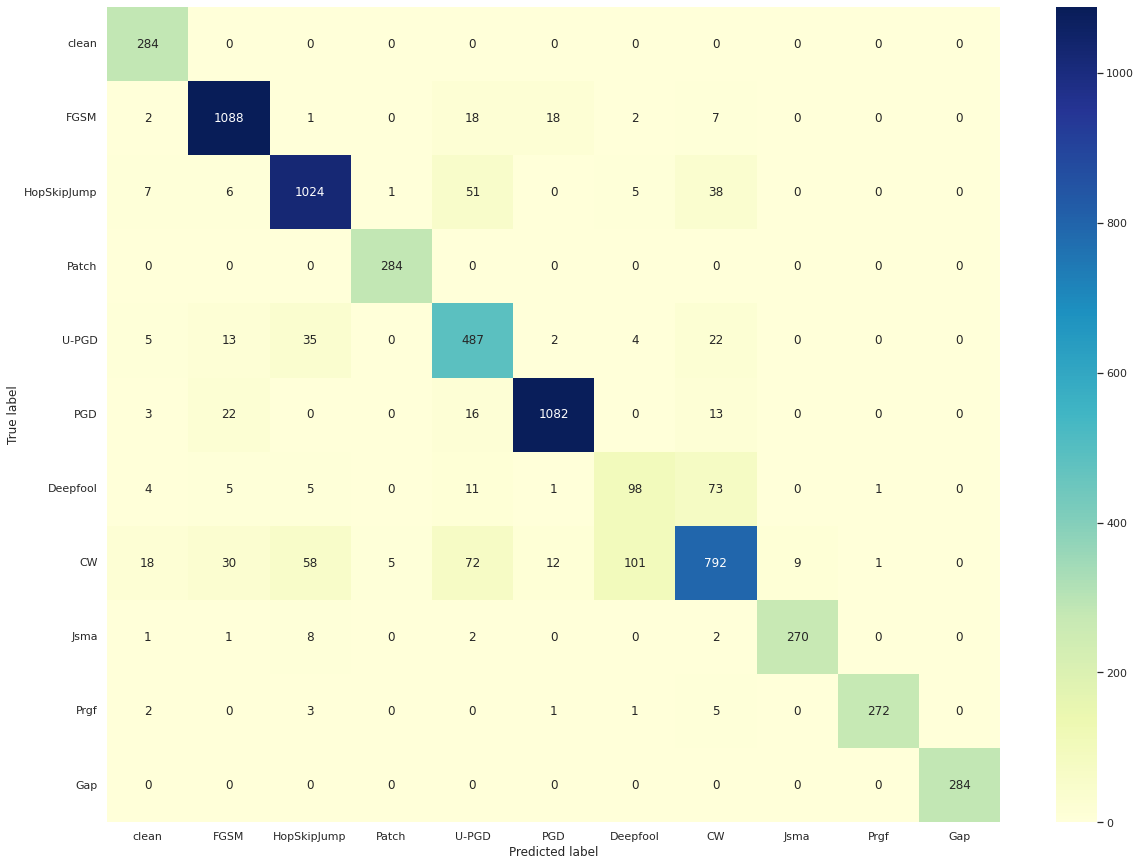

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))

group_ytrue, group_ypred = cal_group_acc('mae finetune', './mae_finetune_model/advpred.npy')
conf_matrix = confusion_matrix(group_ytrue, group_ypred, labels=np.arange(11))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
ax.set(xlabel='Predicted label', ylabel='True label')
# ax.set_yticks(np.arange(10))
ax.set_yticklabels(['clean', 'FGSM', 'HopSkipJump', 'Patch', 'U-PGD', 'PGD', 'Deepfool', 'CW', 'Jsma', 'Prgf', 'Gap'], rotation=0)
ax.set_xticklabels(['clean', 'FGSM', 'HopSkipJump', 'Patch', 'U-PGD', 'PGD', 'Deepfool', 'CW', 'Jsma', 'Prgf', 'Gap'])

In [26]:
from sklearn.manifold import TSNE
import pandas as pd
import time

def visualize_tsne(feature, group_ylabel):

    ft = [ft.numpy() for batch in feature for ft in batch ]
    ft = np.array(ft)
    print(ft.shape)
    feat_cols = [ 'pixel' + str(i) for i in range(ft.shape[1]) ]

    df = pd.DataFrame(ft,columns=feat_cols)
    df['y'] = group_ylabel
    df['label'] = df['y'].apply(lambda i: str(i))

    print('Size of the dataframe: {}'.format(df.shape))
    
    np.random.seed(42)
    rndperm = np.random.permutation(df.shape[0])

    df_subset = df.loc[rndperm[:],:].copy()
    data_subset = df_subset[feat_cols].values

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
#     plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 11),
        data=df_subset,
        legend="full",
        alpha=0.3
    )
#     plt.show()
#     plt.savefig('./output/mae_tsne.png')

(6688, 768)
Size of the dataframe: (6688, 770)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6688 samples in 0.005s...
[t-SNE] Computed neighbors for 6688 samples in 1.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6688
[t-SNE] Computed conditional probabilities for sample 2000 / 6688
[t-SNE] Computed conditional probabilities for sample 3000 / 6688
[t-SNE] Computed conditional probabilities for sample 4000 / 6688
[t-SNE] Computed conditional probabilities for sample 5000 / 6688
[t-SNE] Computed conditional probabilities for sample 6000 / 6688
[t-SNE] Computed conditional probabilities for sample 6688 / 6688
[t-SNE] Mean sigma: 1.412354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.371323
[t-SNE] KL divergence after 300 iterations: 1.796799
t-SNE done! Time elapsed: 6.19029688835144 seconds
(6688, 768)
Size of the dataframe: (6688, 770)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6688 samples in 0.005s...
[t-SNE

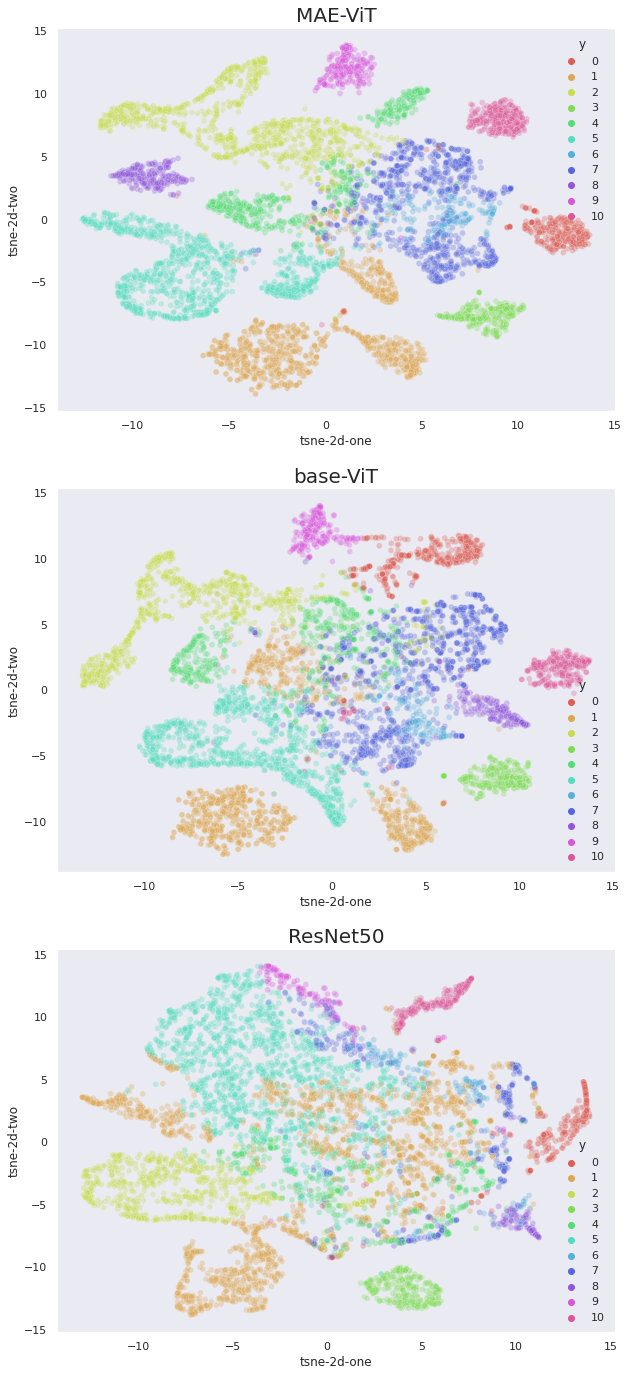

In [95]:
plt.figure(figsize=(10,24))

file = ['./mae_finetune_model/attn_feature.npy', 
        './vit_finetune_model/attn_feature.npy', 
        './resnet50_finetune_model/attn_feature.npy']

title = ['MAE-ViT', 'base-ViT', 'ResNet50']

for i in range(len(file)):
    
    plt.subplot(3, 1, i+1)
    plt.grid(False)
    plt.title(title[i], fontsize=20)
    attn_ft, ypred = np.load(file[i], allow_pickle=True)
    visualize_tsne(attn_ft, ypred)
    
plt.show()

(6688, 768)
Size of the dataframe: (6688, 770)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6688 samples in 0.005s...
[t-SNE] Computed neighbors for 6688 samples in 1.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6688
[t-SNE] Computed conditional probabilities for sample 2000 / 6688
[t-SNE] Computed conditional probabilities for sample 3000 / 6688
[t-SNE] Computed conditional probabilities for sample 4000 / 6688
[t-SNE] Computed conditional probabilities for sample 5000 / 6688
[t-SNE] Computed conditional probabilities for sample 6000 / 6688
[t-SNE] Computed conditional probabilities for sample 6688 / 6688
[t-SNE] Mean sigma: 1.412354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.371319
[t-SNE] KL divergence after 300 iterations: 1.796799
t-SNE done! Time elapsed: 5.909918785095215 seconds


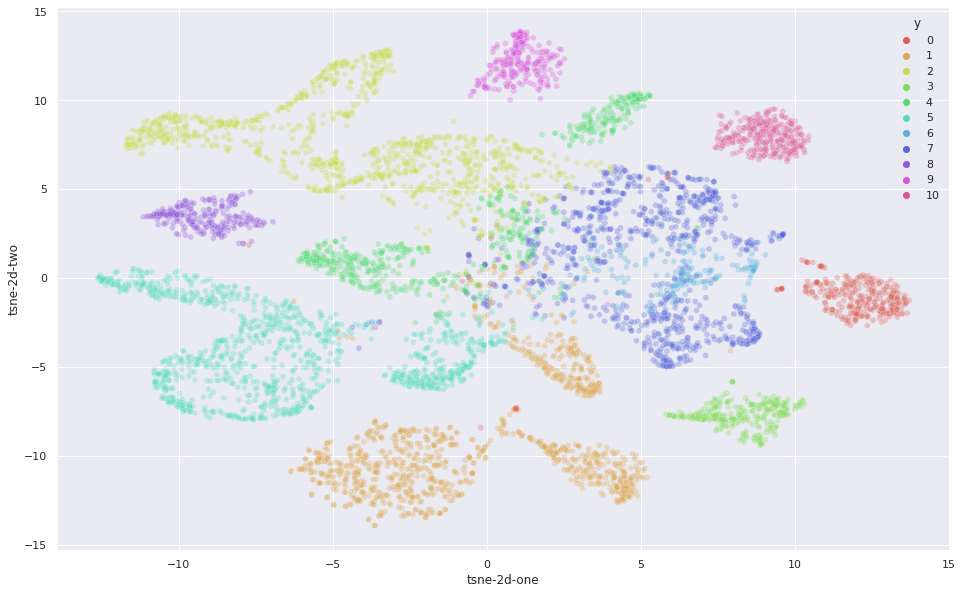

In [13]:
attn_ft, ypred = np.load('./mae_finetune_model/attn_feature.npy', allow_pickle=True)
visualize_tsne(attn_ft, ypred)

(6688, 768)
Size of the dataframe: (6688, 770)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6688 samples in 0.005s...
[t-SNE] Computed neighbors for 6688 samples in 1.300s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6688
[t-SNE] Computed conditional probabilities for sample 2000 / 6688
[t-SNE] Computed conditional probabilities for sample 3000 / 6688
[t-SNE] Computed conditional probabilities for sample 4000 / 6688
[t-SNE] Computed conditional probabilities for sample 5000 / 6688
[t-SNE] Computed conditional probabilities for sample 6000 / 6688
[t-SNE] Computed conditional probabilities for sample 6688 / 6688
[t-SNE] Mean sigma: 1.391436
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.645370
[t-SNE] KL divergence after 300 iterations: 1.921869
t-SNE done! Time elapsed: 5.89323353767395 seconds


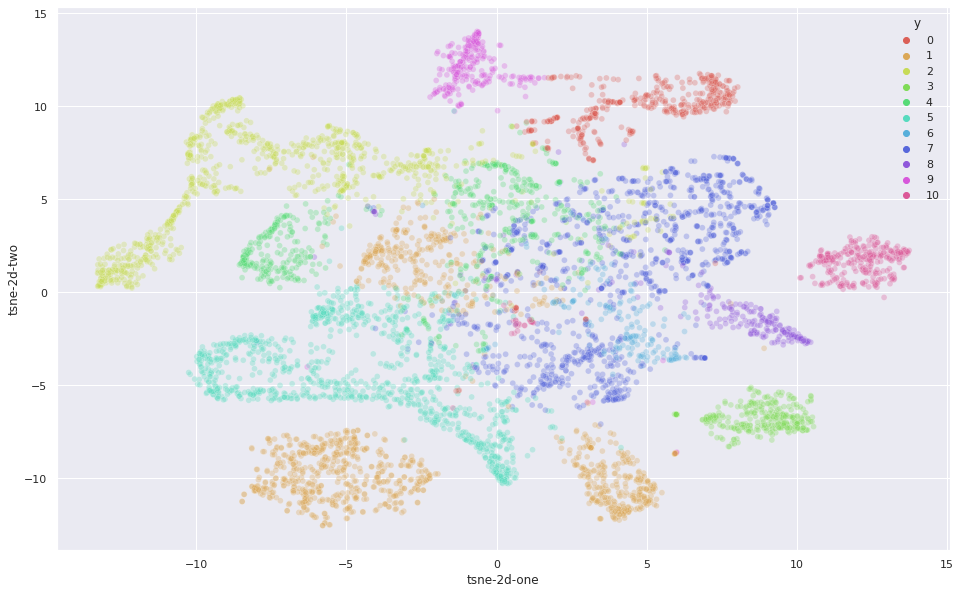

In [14]:
attn_ft, ypred = np.load('./vit_finetune_model/attn_feature.npy', allow_pickle=True)
visualize_tsne(attn_ft, ypred)

(6688, 2048)
Size of the dataframe: (6688, 2050)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6688 samples in 0.013s...
[t-SNE] Computed neighbors for 6688 samples in 1.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6688
[t-SNE] Computed conditional probabilities for sample 2000 / 6688
[t-SNE] Computed conditional probabilities for sample 3000 / 6688
[t-SNE] Computed conditional probabilities for sample 4000 / 6688
[t-SNE] Computed conditional probabilities for sample 5000 / 6688
[t-SNE] Computed conditional probabilities for sample 6000 / 6688
[t-SNE] Computed conditional probabilities for sample 6688 / 6688
[t-SNE] Mean sigma: 2.442896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.298843
[t-SNE] KL divergence after 300 iterations: 1.949837
t-SNE done! Time elapsed: 6.578191518783569 seconds


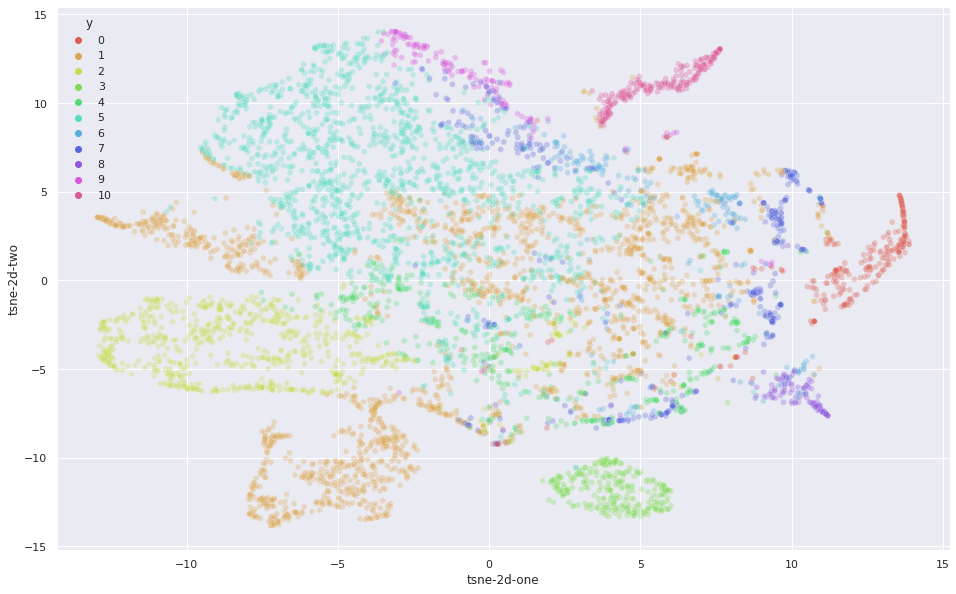

In [20]:
attn_ft, ypred = np.load('./resnet50_finetune_model/attn_feature.npy', allow_pickle=True)
visualize_tsne(attn_ft, ypred)

In [2]:
from sklearn.manifold import TSNE
import pandas as pd
import time
import seaborn as sns

def visualize_tsne(ft, group_ylabel):
    
    feat_cols = [ 'pixel' + str(i) for i in range(ft.shape[1]) ]

    df = pd.DataFrame(ft,columns=feat_cols)
    df['y'] = group_ylabel
    df['label'] = df['y'].apply(lambda i: str(i))

    print('Size of the dataframe: {}'.format(df.shape))
    
    np.random.seed(42)
    rndperm = np.random.permutation(df.shape[0])

    df_subset = df.loc[rndperm[:],:].copy()
    data_subset = df_subset[feat_cols].values

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
#     plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 3),
        data=df_subset,
        legend="full",
        alpha=0.3
    )
#     plt.show()
#     plt.savefig('./output/mae_tsne.png')

[tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1]) tensor([1])
 tensor([1]) tensor([1])]
[tensor([678]) tensor([491]) tensor([392]) tensor([310]) tensor([280])
 tensor([702]) tensor([998]) tensor([71]) tensor([296]) tensor([777])
 tensor([310]) tensor([310]) tensor([702]) tensor([392]) tensor([461])
 tensor([763]) tensor([369]) tensor([510]) tensor([998]) tensor([678])
 tensor([512]) tensor([994]) tensor([369]) tensor([763]) tensor([241])
 tensor([292]) tensor([641]) tensor(

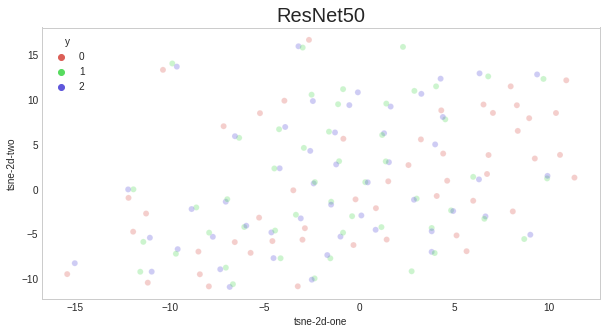

In [4]:
plt.figure(figsize=(10,5))

file = ['../output/imgnet_cls1_orig.npy', 
        '../output/imgnet_cls1_fgsm4.npy', 
        '../output/imgnet_cls1_fgsm4_rec.npy']

title = ['MAE-ViT', 'base-ViT', 'ResNet50']

attn_ft = []
y = []
for i in range(len(file)):
    attn = np.load(file[i], allow_pickle=True) 
    attn_ft.append(attn[:,0])
    print(attn[:,1])
    y.append(np.repeat(i, len(attn[:,1])))

    
ATTN = [f[0].numpy() for ft in attn_ft for f in ft]
ATTN = np.array(ATTN)
print(ATTN.shape)

YL = [yl for y_label in y for yl in y_label]
YL = np.array(YL)
print(YL.shape)
print(YL)

plt.grid(False)
plt.title(title[i], fontsize=20)
visualize_tsne(ATTN, YL)
    
plt.show()

In [15]:
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
from patchify import patchify, unpatchify
from PIL import Image
import cv2
import seaborn as sns
import os

In [16]:
vit_attn_mat = np.load('./vit_finetune_model/viz_attn_map_e99.npy', allow_pickle=True)

In [17]:
mae_attn_mat = np.load('./mae_tfl_mlp_model/viz_attn_map_e99.npy', allow_pickle=True)

In [18]:
mae_diff_attn_mat = np.load('./mae_finetune_model/viz_diff_attn_map.npy', allow_pickle=True)

In [19]:
is_train = False
root = os.path.join('/local/rcs/yunyun/To_Columbia/adversarial_example', 'train' if is_train else 'val')

t = []
t.append(transforms.ToTensor())
# t.append(transforms.Normalize(mean, std))

dataset = ImageFolder(root, transform = transforms.Compose(t))
nb_classes = 25

assert len(dataset.class_to_idx) == nb_classes

data_loader_val = torch.utils.data.DataLoader(
            dataset,
            batch_size=1,
            num_workers= 2,
            drop_last=False)

In [19]:
val_datapath = '/local/rcs/yunyun/To_Columbia/adversarial_example/val'
diff_datapath = '/local/rcs/yunyun/To_Columbia/adversarial_example/diff_val'

valdir = os.listdir(val_datapath)
diffdir = os.listdir(diff_datapath)

val_img_dir = []
diff_img_dir = []

for i in np.sort(valdir):
    img_filedir = []
    class_dir = os.path.join(val_datapath, i)
    im_dir = os.listdir(class_dir)
    for j in np.sort(im_dir):
        im_path = os.path.join(class_dir, j)
        img_filedir.append(im_path)
    val_img_dir.append(img_filedir)

for i in np.sort(diffdir):
    img_filedir = []
    class_dir = os.path.join(diff_datapath, i)
    im_dir = os.listdir(class_dir)
    for j in np.sort(im_dir):
        im_path = os.path.join(class_dir, j)
        img_filedir.append(im_path)
    diff_img_dir.append(img_filedir)
    
# for i in range(len(cls_img_dir)):
#     print(len(cls_img_dir[i]))
    
def count_file_num(cls_img_dir, cls_num, file_num):
    total_sum = 0
    if cls_num == 0:
        total_sum += (file_num)
    else:
        total_sum += 284
        for i in range(0, cls_num-1):
            total_sum += len(cls_img_dir[i])
        total_sum += (file_num)
    return total_sum

In [20]:
def calculate_map_dist(m1, m2, center_idx):
    
    print(m1.shape)
    x1 = m1[5][center_idx].unsqueeze(0) # 1*196
    x2 = m2[5][center_idx].unsqueeze(0)
    dist = [torch.cdist(x1, x2) for i in range(m1.shape[0])]
    print(dist)  

In [21]:
from matplotlib.backends.backend_pdf import PdfPages

(70,)
(70,)
(70,)
299.0
299.0
299.0
299.0
299.0
299.0
299.0
299.0


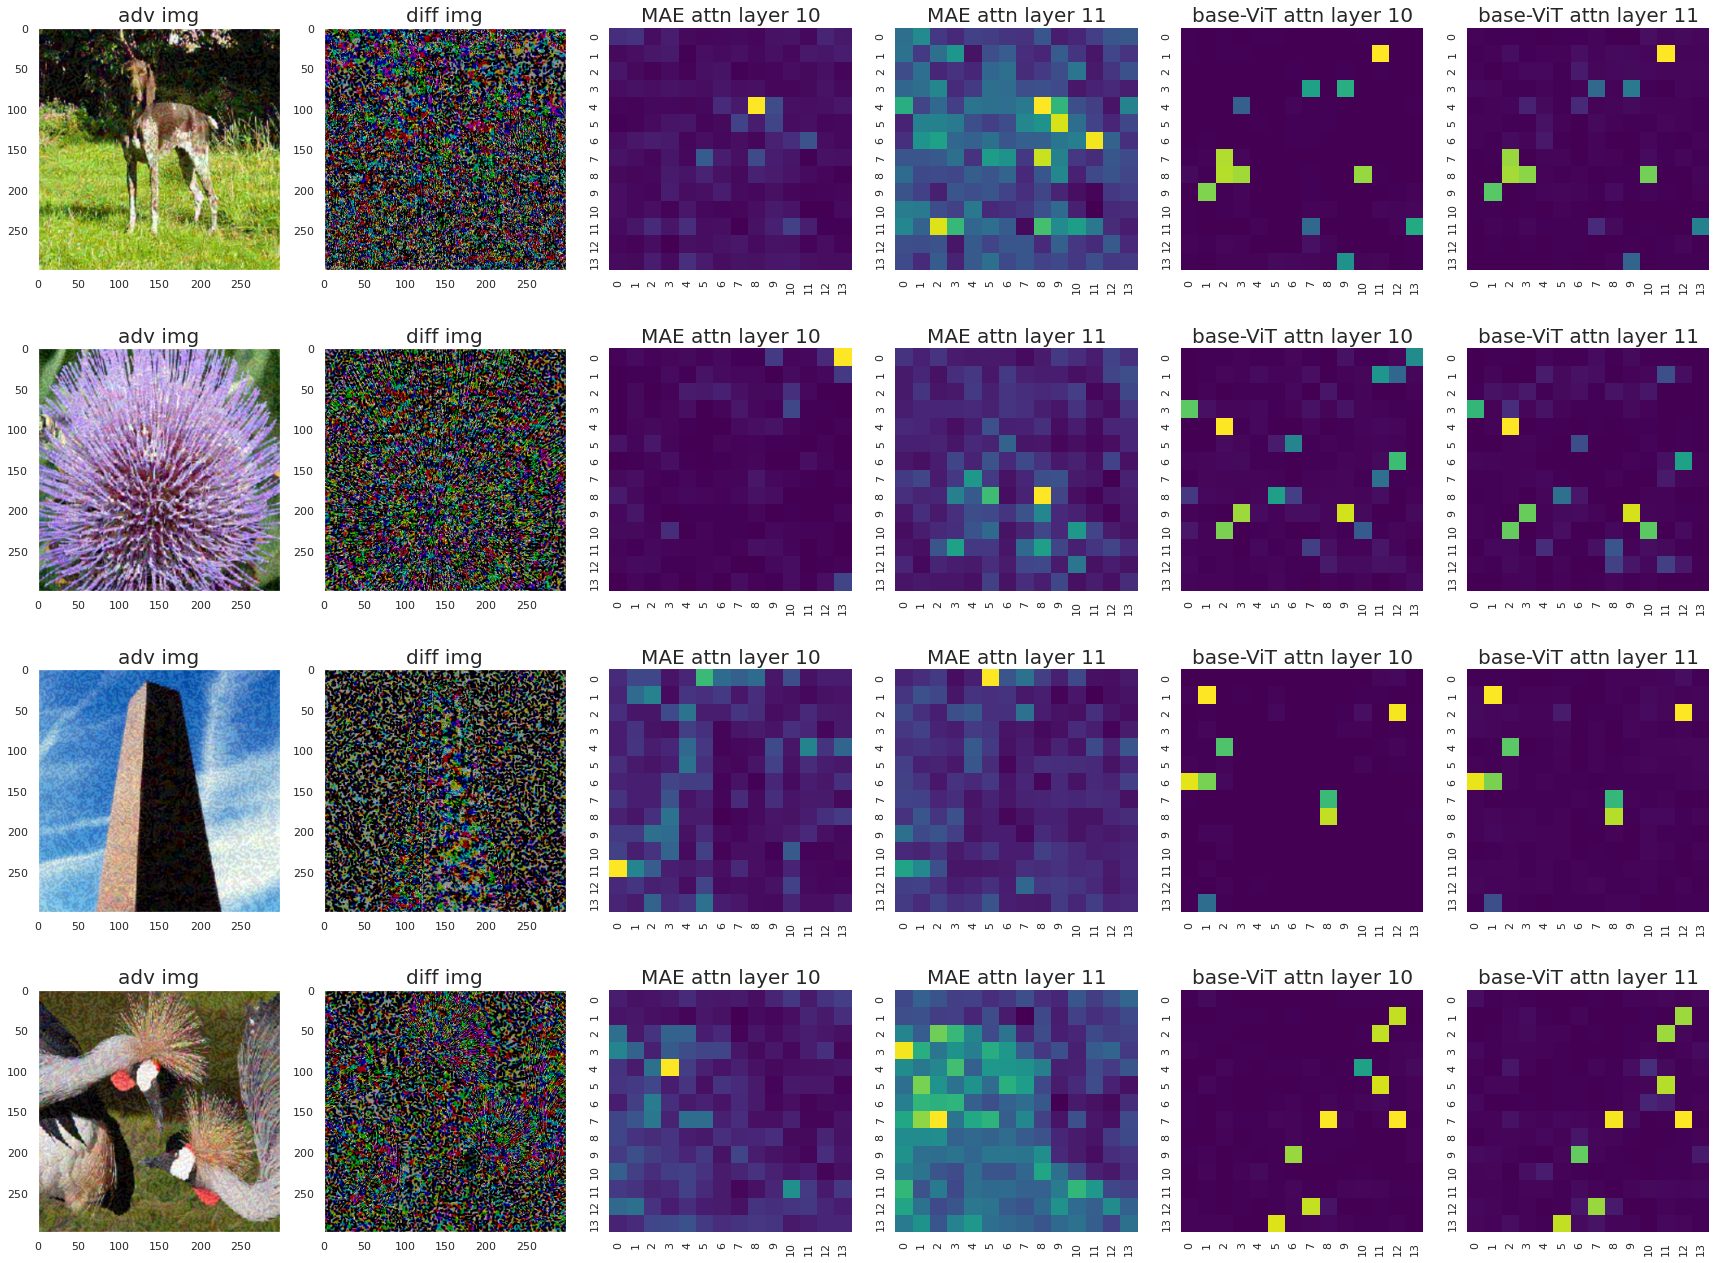

In [91]:
print(mae_attn_mat.shape)
print(mae_diff_attn_mat.shape)
print(vit_attn_mat.shape)


mae_attn_map = [attn for i in range(mae_attn_mat.shape[0]) for attn in mae_attn_mat[i]]
mae_diff_attn_map = [attn for i in range(mae_diff_attn_mat.shape[0]) for attn in mae_diff_attn_mat[i]]
vit_attn_map = [attn for i in range(vit_attn_mat.shape[0]) for attn in vit_attn_mat[i]]
    
adv_file = [0, 5, 15, 19]  


with PdfPages('attn_cls4.pdf') as pdf:
    

    fig = plt.figure(figsize=(24,18))
    
    for j in range(len(adv_file)):

        cls_num = 4
        sample_num = adv_file[j]
        
        image = Image.open(val_img_dir[cls_num][sample_num])
        diff_image = Image.open(diff_img_dir[cls_num][sample_num])
        
        diff_image = np.array(diff_image)*3
        index = count_file_num(val_img_dir, cls_num, sample_num)
    #     print(index)

        attn_map = mae_attn_map[index]
        diff_attn_map = mae_diff_attn_map[index]
        vit_atten_map = vit_attn_map[index]

    #     print(attn_map.shape)
        center_idx = attn_map.shape[1]//2
    #     print('center patch: {}'.format(center_idx))
        patch_size = int(np.sqrt(attn_map[0].shape[0]))
    #     print(attn_map[0].shape)

    #         vmin = min(attn_map[].min(), attn_block2.min())
    #         vmax = max(attn_block1.max(), attn_block2.max())
    #     calculate_map_dist(vit_atten_map, diff_attn_map, center_idx)
    
#         plt.subplot(j+1, 6, j*6+1, figsize=(3,3))


        ax = fig.add_subplot(4, 6, j*6+1)
        ax.set_title('adv img', fontsize = 20)
        ax.imshow(image)
        ax.grid(False)


#         plt.subplot(j+1, 6, j*6+2, figsize=(3,3))


        ax = fig.add_subplot(4, 6, j*6+2)
        ax.set_title('diff img', fontsize = 20)
        ax.imshow(diff_image)
        ax.grid(False)
        
        x0,x1 = ax.get_xlim()
        y0,y1 = ax.get_ylim()
        print(abs(x1-x0))
        print(abs(y1-y0))
        ax.set_aspect(abs(x1-x0)/abs(y1-y0))


        for i in range(3,5):
#             plt.subplot(j+1, 6, j*6+i, figsize=(3,3))


            ax = fig.add_subplot(4, 6, j*6+i)
            ax.set_title('MAE attn layer '+ str(i+7), fontsize = 20)
            g = sns.heatmap(attn_map[i+1][center_idx].reshape(patch_size, patch_size).data, annot=False, cmap='viridis', cbar=False)
            ax.grid(False)
        
            ax.set_aspect(abs(x1-x0)/abs(y1-y0))


        for i in range(5,7):
#             plt.subplot(j+1, 6, j*6+i, figsize=(3,3))

            ax = fig.add_subplot(4, 6, j*6+i)
            ax.set_title('base-ViT attn layer '+ str(i+5), fontsize = 20)

            g = sns.heatmap(vit_atten_map[i-1][center_idx].reshape(patch_size, patch_size).data, annot=False, cmap='viridis', cbar=False)
            ax.grid(False)
        
            ax.set_aspect(abs(x1-x0)/abs(y1-y0))
        
    fig.tight_layout()
    plt.show()
        
    pdf.savefig(fig)

In [22]:
checkpoint_num = [19, 39, 59, 79, 99]
vit_attn_epoch_list = []
mae_attn_epoch_list = []

for i in checkpoint_num:
    
    vit_attn_list = []
    mae_attn_list = []

    data1 = np.load('./vit_finetune_model/viz_attn_map_e' +  str(i) + '.npy', allow_pickle=True)
    data2 = np.load('./mae_tfl_mlp_model/viz_attn_map_e' +  str(i) + '.npy', allow_pickle=True)
    
    attn_map1 = [attn for i in range(data1.shape[0]) for attn in data1[i]]
    attn_map2 = [attn for i in range(data2.shape[0]) for attn in data2[i]]

    cnt_i = 0
    for i in range(len(val_img_dir)):
        vit_attn_list.append(attn_map1[cnt_i:cnt_i+len(val_img_dir[i])])
        mae_attn_list.append(attn_map2[cnt_i:cnt_i+len(val_img_dir[i])])
        cnt_i += len(val_img_dir[i])
        
    vit_attn_epoch_list.append(vit_attn_list)
    mae_attn_epoch_list.append(mae_attn_list)  

In [66]:
len(vit_attn_epoch_list[4])
a = np.array([1,2,3])
b = np.arange(10)
print(a)
print(b)
print(b[~a])

[1 2 3]
[0 1 2 3 4 5 6 7 8 9]
[8 7 6]


In [77]:
def find_missing(class_idx):
    l1 = np.arange(284)
    l2 = [int(i.split('/')[-1].split('.')[0]) for i in val_img_dir[class_idx]]
    missing = list(sorted(set(l1) - set(set2)))
    print('missing: ', missing)
    return missing

In [123]:
import ot

def cal_SWD(attn_list, class0, class1):
    
    attn_list = np.array(attn_list)

    subset1 = np.array(attn_list[class0])
    subset2 = np.array(attn_list[class1])
    
    result = []
#     for i in range(5):
#     print(subset1.shape)
    #extract layer 11 attention map on center_patch 
    sample_subset1 = [s for s in subset1]
    sample_subset2 = [s for s in subset2]

    xs = np.array(sample_subset1)
    xt = np.array(sample_subset2)
    
    if xs.shape[0] < xt.shape[0]:
        remove_indices = find_missing(class0)
        xt = [i for j, i in enumerate(xt) if j in remove_indices]
        xt = np.array(xt)
#     print('xs shape: ', xs.shape, 'xt shape: ',  xt.shape)

    n = len(sample_subset1)
    a, b = np.ones((n,)) / n, np.ones((n,)) / n

    n_seed = 10
    n_projections_arr = np.logspace(0, 3, 1, dtype=int)
    res = np.empty((n_seed, 1))

    for seed in range(n_seed):
        for i, n_projections in enumerate(n_projections_arr):
            res[seed, i] = ot.sliced_wasserstein_distance(xs, xt, a, b, n_projections, seed=seed)

    res_mean = np.mean(res, axis=0)
    res_std = np.std(res, axis=0)
#     result.append(res_mean)
    return res_mean[0], res_std[0]

In [124]:
def load_ft(feature): 
    attn_list = []
    print(len(feature))

    ft = [ft.numpy() for batch in feature for ft in batch]
    ft = np.array(ft)
    print(ft.shape)
    cnt_i = 0
    for i in range(len(val_img_dir)):
        attn_list.append(ft[cnt_i:cnt_i+len(val_img_dir[i])])
        cnt_i += len(val_img_dir[i]) 
    return attn_list

In [125]:
file = ['./mae_finetune_model/attn_feature.npy', 
        './vit_finetune_model/attn_feature.npy', 
        './resnet50_finetune_model/attn_feature.npy']

vit_attn_ft, ypred = np.load(file[0], allow_pickle=True)
mae_attn_ft, ypred = np.load(file[1], allow_pickle=True)
dnn_attn_ft, ypred = np.load(file[2], allow_pickle=True)

vit_list = load_ft(vit_attn_ft)
mae_list = load_ft(mae_attn_ft)
dnn_list = load_ft(dnn_attn_ft)
print(len(vit_list[0]))

70
(6688, 768)
70
(6688, 768)
70
(6688, 2048)
284


In [130]:
checkpoint_num = [19, 39, 59, 79, 99]
vit_result_list = []
mae_result_list = []
dnn_result_list = []
for class0 in range(25):
    for class1 in range(25):
        print('class {} --> class {} '.format(class0, class1))
        vit_result = cal_SWD(vit_list, class0, class1)
        mae_result = cal_SWD(mae_list, class0, class1)
        dnn_result = cal_SWD(dnn_list, class0, class1)
        print('vit SWD: {:.2f} | mae SWD: {:.2f} | dnn SWD :{:.2f}'.format(vit_result[0], mae_result[0], dnn_result[0]))
        vit_result_list.append(vit_result)
        mae_result_list.append(mae_result)
        dnn_result_list.append(dnn_result)


class 0 --> class 0 
vit SWD: 0.00 | mae SWD: 0.00 | dnn SWD :0.00
class 0 --> class 1 


/tmp/ipykernel_20517/826418705.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  attn_list = np.array(attn_list)


vit SWD: 0.40 | mae SWD: 0.57 | dnn SWD :0.54
class 0 --> class 2 
vit SWD: 0.60 | mae SWD: 0.31 | dnn SWD :1.13
class 0 --> class 3 
vit SWD: 0.39 | mae SWD: 0.32 | dnn SWD :1.08
class 0 --> class 4 
vit SWD: 0.39 | mae SWD: 0.32 | dnn SWD :1.08
class 0 --> class 5 
vit SWD: 0.76 | mae SWD: 0.52 | dnn SWD :0.50
class 0 --> class 6 
vit SWD: 0.45 | mae SWD: 0.52 | dnn SWD :0.71
class 0 --> class 7 
vit SWD: 0.76 | mae SWD: 0.55 | dnn SWD :0.52
class 0 --> class 8 
vit SWD: 0.40 | mae SWD: 0.47 | dnn SWD :0.78
class 0 --> class 9 
vit SWD: 0.62 | mae SWD: 0.49 | dnn SWD :0.75
class 0 --> class 10 
vit SWD: 0.55 | mae SWD: 0.53 | dnn SWD :0.57
class 0 --> class 11 
vit SWD: 0.63 | mae SWD: 0.49 | dnn SWD :0.50
class 0 --> class 12 
vit SWD: 0.61 | mae SWD: 0.45 | dnn SWD :0.84
class 0 --> class 13 
vit SWD: 0.59 | mae SWD: 0.52 | dnn SWD :0.99
class 0 --> class 14 
vit SWD: 0.61 | mae SWD: 0.43 | dnn SWD :0.89
class 0 --> class 15 
vit SWD: 0.55 | mae SWD: 0.50 | dnn SWD :0.59
class 0 --

vit SWD: 0.46 | mae SWD: 0.27 | dnn SWD :0.70
class 4 --> class 24 
vit SWD: 0.15 | mae SWD: 0.44 | dnn SWD :0.69
class 5 --> class 0 
vit SWD: 0.76 | mae SWD: 0.52 | dnn SWD :0.50
class 5 --> class 1 
vit SWD: 0.52 | mae SWD: 0.26 | dnn SWD :0.13
class 5 --> class 2 
vit SWD: 0.44 | mae SWD: 0.45 | dnn SWD :0.77
class 5 --> class 3 
vit SWD: 0.54 | mae SWD: 0.37 | dnn SWD :0.71
class 5 --> class 4 
vit SWD: 0.54 | mae SWD: 0.36 | dnn SWD :0.71
class 5 --> class 5 
vit SWD: 0.00 | mae SWD: 0.00 | dnn SWD :0.00
class 5 --> class 6 
vit SWD: 0.44 | mae SWD: 0.34 | dnn SWD :0.41
class 5 --> class 7 
vit SWD: 0.07 | mae SWD: 0.09 | dnn SWD :0.10
class 5 --> class 8 
vit SWD: 0.51 | mae SWD: 0.42 | dnn SWD :0.52
class 5 --> class 9 
vit SWD: 0.38 | mae SWD: 0.57 | dnn SWD :0.39
class 5 --> class 10 
vit SWD: 0.43 | mae SWD: 0.26 | dnn SWD :0.14
class 5 --> class 11 
vit SWD: 0.17 | mae SWD: 0.09 | dnn SWD :0.06
class 5 --> class 12 
vit SWD: 0.33 | mae SWD: 0.44 | dnn SWD :0.51
class 5 --> 

missing:  [0, 114, 214]
vit SWD: 0.59 | mae SWD: 0.51 | dnn SWD :0.52
class 8 --> class 16 
vit SWD: 0.73 | mae SWD: 0.62 | dnn SWD :0.54
class 8 --> class 17 
vit SWD: 0.80 | mae SWD: 0.57 | dnn SWD :0.61
class 8 --> class 18 
vit SWD: 0.61 | mae SWD: 0.53 | dnn SWD :0.50
class 8 --> class 19 
vit SWD: 0.70 | mae SWD: 0.58 | dnn SWD :0.57
class 8 --> class 20 
vit SWD: 0.60 | mae SWD: 0.51 | dnn SWD :0.50
class 8 --> class 21 
vit SWD: 0.67 | mae SWD: 0.55 | dnn SWD :0.54
class 8 --> class 22 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.55 | mae SWD: 0.57 | dnn SWD :0.49
class 8 --> class 23 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.68 | mae SWD: 0.61 | dnn SWD :0.58
class 8 --> class 24 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.50 | mae SWD: 0.72 | dnn SWD :0.51
class 9 --> class 0 
vit SWD: 0.62 | mae SWD: 0.49 | dnn SWD :0.75
class 9 --> class 1 
vit SWD: 0.49 

vit SWD: 0.35 | mae SWD: 0.34 | dnn SWD :0.65
class 13 --> class 8 
vit SWD: 0.55 | mae SWD: 0.46 | dnn SWD :0.71
class 13 --> class 9 
vit SWD: 0.38 | mae SWD: 0.63 | dnn SWD :0.71
class 13 --> class 10 
vit SWD: 0.48 | mae SWD: 0.50 | dnn SWD :0.60
class 13 --> class 11 
vit SWD: 0.31 | mae SWD: 0.39 | dnn SWD :0.71
class 13 --> class 12 
vit SWD: 0.31 | mae SWD: 0.32 | dnn SWD :0.21
class 13 --> class 13 
vit SWD: 0.00 | mae SWD: 0.00 | dnn SWD :0.00
class 13 --> class 14 
vit SWD: 0.29 | mae SWD: 0.31 | dnn SWD :0.14
class 13 --> class 15 
vit SWD: 0.46 | mae SWD: 0.35 | dnn SWD :0.50
class 13 --> class 16 
vit SWD: 0.44 | mae SWD: 0.71 | dnn SWD :0.58
class 13 --> class 17 
vit SWD: 0.61 | mae SWD: 0.66 | dnn SWD :0.47
class 13 --> class 18 
vit SWD: 0.34 | mae SWD: 0.58 | dnn SWD :0.67
class 13 --> class 19 
vit SWD: 0.44 | mae SWD: 0.69 | dnn SWD :0.49
class 13 --> class 20 
vit SWD: 0.33 | mae SWD: 0.57 | dnn SWD :0.68
class 13 --> class 21 
vit SWD: 0.38 | mae SWD: 0.61 | dnn 

missing:  [0, 114, 214]
vit SWD: 0.50 | mae SWD: 0.49 | dnn SWD :0.44
class 17 --> class 2 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.56 | mae SWD: 0.60 | dnn SWD :0.69
class 17 --> class 3 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.57 | mae SWD: 0.46 | dnn SWD :0.78
class 17 --> class 4 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.56 | mae SWD: 0.47 | dnn SWD :0.74
class 17 --> class 5 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.70 | mae SWD: 0.50 | dnn SWD :0.46
class 17 --> class 6 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.56 | mae SWD: 0.61 | dnn SWD :0.75
class 17 --> class 7 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.76 | mae SWD: 0.46 | dnn SWD :0.52
class 17 --> class 8 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 2

vit SWD: 0.51 | mae SWD: 0.54 | dnn SWD :0.49
class 19 --> class 15 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.48 | mae SWD: 0.45 | dnn SWD :0.41
class 19 --> class 16 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.42 | mae SWD: 0.40 | dnn SWD :0.41
class 19 --> class 17 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.47 | mae SWD: 0.46 | dnn SWD :0.51
class 19 --> class 18 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.45 | mae SWD: 0.42 | dnn SWD :0.45
class 19 --> class 19 
vit SWD: 0.00 | mae SWD: 0.00 | dnn SWD :0.00
class 19 --> class 20 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.44 | mae SWD: 0.44 | dnn SWD :0.44
class 19 --> class 21 
missing:  [0, 114, 214]
missing:  [0, 114, 214]
missing:  [0, 114, 214]
vit SWD: 0.52 | mae SWD: 0.55 | dnn SWD :0.45
class 19 --> class 22 
missing:  [0, 11

vit SWD: 0.43 | mae SWD: 0.47 | dnn SWD :0.49
class 22 --> class 9 
vit SWD: 0.48 | mae SWD: 0.49 | dnn SWD :0.30
class 22 --> class 10 
vit SWD: 0.47 | mae SWD: 0.33 | dnn SWD :0.15
class 22 --> class 11 
vit SWD: 0.42 | mae SWD: 0.23 | dnn SWD :0.13
class 22 --> class 12 
vit SWD: 0.45 | mae SWD: 0.42 | dnn SWD :0.46
class 22 --> class 13 
vit SWD: 0.34 | mae SWD: 0.47 | dnn SWD :0.61
class 22 --> class 14 
vit SWD: 0.47 | mae SWD: 0.42 | dnn SWD :0.50
class 22 --> class 15 
vit SWD: 0.28 | mae SWD: 0.32 | dnn SWD :0.21
class 22 --> class 16 
vit SWD: 0.53 | mae SWD: 0.39 | dnn SWD :0.32
class 22 --> class 17 
vit SWD: 0.58 | mae SWD: 0.42 | dnn SWD :0.42
class 22 --> class 18 
vit SWD: 0.46 | mae SWD: 0.27 | dnn SWD :0.16
class 22 --> class 19 
vit SWD: 0.50 | mae SWD: 0.45 | dnn SWD :0.40
class 22 --> class 20 
vit SWD: 0.45 | mae SWD: 0.27 | dnn SWD :0.16
class 22 --> class 21 
vit SWD: 0.52 | mae SWD: 0.33 | dnn SWD :0.24
class 22 --> class 22 
vit SWD: 0.00 | mae SWD: 0.00 | dnn

In [ ]:
res1 = cal_SWD(vit_attn_epoch_list, 0, 0)
res2 = cal_SWD(mae_attn_epoch_list, 4, 0)

In [98]:
print(res1)

[array([0.00267672, 0.00308859, 0.00287758, 0.00288269, 0.00287434]), array([0.00240698, 0.00274464, 0.00255717, 0.00261947, 0.00260867]), array([0.00241571, 0.00271495, 0.00258829, 0.00264634, 0.00264381]), array([0.00315108, 0.00335083, 0.00322007, 0.00328013, 0.00327213]), array([0.00310995, 0.00341628, 0.00323267, 0.00329053, 0.00328546])]


[0.002879985700009215, 0.002587387837770757, 0.0026018197653436626, 0.0032548481855141373, 0.0032669785540713455]
[0.002848258384009649, 0.002675983125067913, 0.0031646048066969906, 0.0027124280655040018, 0.0029103910935448056]


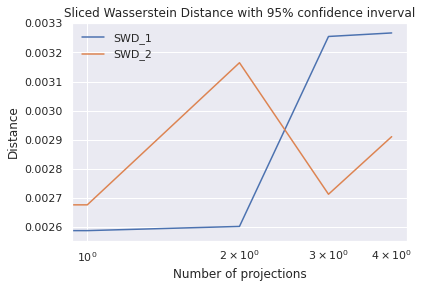

In [100]:
r1 = [r.mean() for r in res1]
r2 = [r.mean() for r in res2]
print(r1)
print(r2)
plt.figure(2)
plt.plot(np.arange(5), r1, label="SWD_1")
plt.plot(np.arange(5), r2, label="SWD_2")
# plt.fill_between(n_projections_arr, res_mean - 2 * res_std, res_mean + 2 * res_std, alpha=0.5)

plt.legend()
plt.xscale('log')
plt.xlabel("Number of projections")
plt.ylabel("Distance")
plt.title('Sliced Wasserstein Distance with 95% confidence inverval')

plt.show()

In [59]:
checkpoint_num = [99]

for i in checkpoint_num:
    
    vit_attn_list = []
    mae_attn_list = []

    data = np.load('./mae_tfl_mlp_model/viz_attn_map_e' +  str(i) + '.npy', allow_pickle=True)
    
    attn_map = [attn for i in range(data.shape[0]) for attn in data[i]]
    print(len(attn_map))
    cnt_i = 0
    for i in range(len(val_img_dir)):
        print('cls {}: {}'.format(i,  len(val_img_dir[i])))  
    
        vit_attn_list.append(attn_map[cnt_i:cnt_i+len(val_img_dir[i])])
        cnt_i += len(val_img_dir[i])

    print(np.array(vit_attn_list[9]).shape)
        

6688
cls 0: 284
cls 1: 284
cls 2: 284
cls 3: 284
cls 4: 284
cls 5: 284
cls 6: 282
cls 7: 284
cls 8: 282
cls 9: 284
cls 10: 284
cls 11: 284
cls 12: 284
cls 13: 284
cls 14: 284
cls 15: 284
cls 16: 198
cls 17: 216
cls 18: 230
cls 19: 194
cls 20: 230
cls 21: 228
cls 22: 284
cls 23: 284
cls 24: 284
(284,)


/tmp/ipykernel_76794/3720489463.py:19: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print(np.array(vit_attn_list[9]).shape)
/tmp/ipykernel_76794/3720489463.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(vit_attn_list[9]).shape)


/tmp/ipykernel_76794/897149426.py:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  vit_attn_list = np.array(vit_attn_list)
/tmp/ipykernel_76794/897149426.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vit_attn_list = np.array(vit_attn_list)
/tmp/ipykernel_76794/897149426.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of

98
(196,)
196
31


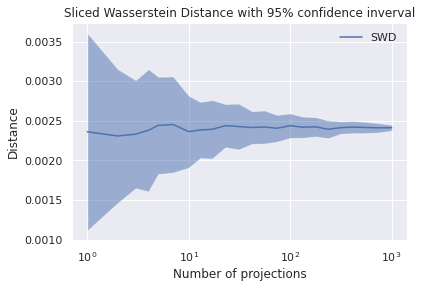

In [60]:
import ot
vit_attn_list = np.array(vit_attn_list)

subset1 = np.array(vit_attn_list[9])
subset2 = np.array(vit_attn_list[0])

center_index = subset1[0].shape[-1]//2
print(center_index)
#extract layer 11 attention map on center_patch 
sample_subset1 = [s[5][center_index].numpy() for s in subset1]
sample_subset2 = [s[5][center_index].numpy() for s in subset2]

xs = np.array(sample_subset1)
xt = np.array(sample_subset2)
print(xs[0].shape)
print(xt.shape[1])

n = len(sample_subset1)
a, b = np.ones((n,)) / n, np.ones((n,)) / n

n_seed = 50
n_projections_arr = np.logspace(0, 3, 25, dtype=int)
print(n_projections_arr[12])
res = np.empty((n_seed, 25))


for seed in range(n_seed):
    for i, n_projections in enumerate(n_projections_arr):
        res[seed, i] = ot.sliced_wasserstein_distance(xs, xt, a, b, n_projections, seed=seed)

res_mean = np.mean(res, axis=0)
res_std = np.std(res, axis=0)


plt.figure(2)
plt.plot(n_projections_arr, res_mean, label="SWD")
plt.fill_between(n_projections_arr, res_mean - 2 * res_std, res_mean + 2 * res_std, alpha=0.5)

plt.legend()
plt.xscale('log')

plt.xlabel("Number of projections")
plt.ylabel("Distance")
plt.title('Sliced Wasserstein Distance with 95% confidence inverval')

plt.show()

In [138]:
attack_dic = {0:'clean', 1:'fgsm-linf2', 2:'fgsm-linf8', 3:'fgsm-linf16-untar.', 4:'fgsm-linf16-tar.', 5:'hop-untar.', 6:'hop-tar.', 7:'hop-untar.', 8:'hop-tar.', 9:'patch', 
          10: 'universal-12', 11: 'universal-2', 12:'pgd-linf8', 13:'pgd-linf16',  14:'pgd-linf12',  15:'pgd-linf4',
         16:'deepfool', 17:'cw-linf16', 18:'cw-linf12',  19:'cw-linf8-tar.',  20:'cw-linf8-untar',  
          21:'cw-l2', 22:'saliency', 23:'prgf-l2',24:'gap'}

In [139]:
import csv
cnt = 0 
known_class_acc = []
unknown_class_acc = []

with open('./pretrain_mae_base_patch16_224/anamoly_detect.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if cnt < 21:
            print('cls: ,' + attack_dic[int(row[1])] + ' , acc: ,' + row[3] +  ' , p_value: ,' + row[5])
            known_class_acc.append(float(row[3]))
        elif cnt >= 21 and cnt < 25:
            unknown_class_acc.append(float(row[3]))
            cls_idx = int(row[1].split('_')[0][3:])
            print('cls: ,' + attack_dic[cls_idx] + ' , acc: ,' + row[3] +  ' , p_value: ,' + row[5])
        cnt += 1

cls: ,clean , acc: ,0.06451612903225806 , p_value: ,0.5062571670738395
cls: ,fgsm-linf2 , acc: ,0.3548387096774194 , p_value: ,0.24131226005883227
cls: ,fgsm-linf8 , acc: ,0.3870967741935484 , p_value: ,0.18596998554120758
cls: ,fgsm-linf16-untar. , acc: ,1.0 , p_value: ,0.0030911901081916993
cls: ,fgsm-linf16-tar. , acc: ,1.0 , p_value: ,0.0030911901081916993
cls: ,hop-untar. , acc: ,0.2903225806451613 , p_value: ,0.21558558109388243
cls: ,hop-tar. , acc: ,0.6774193548387096 , p_value: ,0.04168120855561649
cls: ,hop-untar. , acc: ,0.06451612903225806 , p_value: ,0.46188363164979807
cls: ,hop-tar. , acc: ,1.0 , p_value: ,0.0030911901081916993
cls: ,universal-12 , acc: ,0.06451612903225806 , p_value: ,0.4483222814977314
cls: ,universal-2 , acc: ,0.4838709677419355 , p_value: ,0.14448820860547443
cls: ,pgd-linf8 , acc: ,0.03225806451612903 , p_value: ,0.5795482873809642
cls: ,pgd-linf16 , acc: ,0.03225806451612903 , p_value: ,0.6062721244453309
cls: ,pgd-linf12 , acc: ,0.0322580645161290

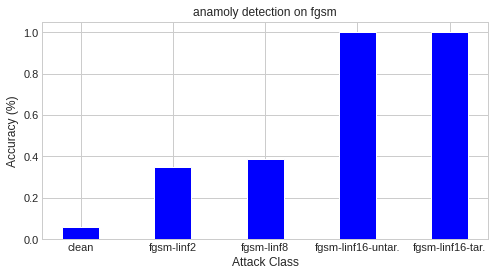

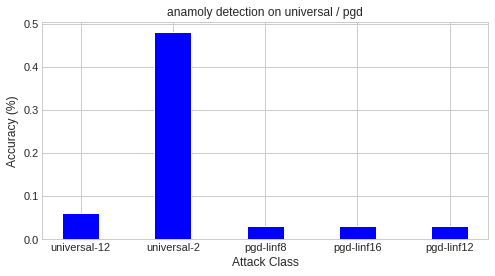

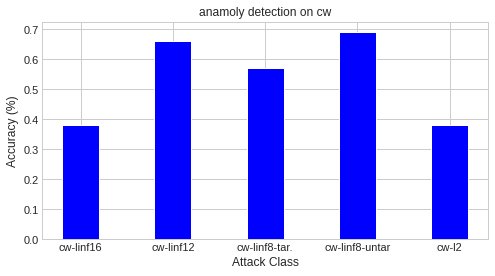

In [140]:
import numpy as np
import matplotlib.pyplot as plt


 
attack_list = list(attack_dic.values())
known_class_acc = [ round(elem, 2) for elem in known_class_acc ]
# creating the bar plot
fig = plt.figure(figsize = (8, 4))
plt.bar(attack_list[0:5], known_class_acc[0:5], color ='blue', width = 0.4)
plt.xlabel("Attack Class")
plt.ylabel("Accuracy (%)")
plt.title("anamoly detection on " + attack_list[1].split('-')[0])
plt.show()

# fig = plt.figure(figsize = (8, 4))
# plt.bar(attack_list[5:9], known_class_acc[5:9], color ='blue', width = 0.4)
# plt.xlabel("Attack Class")
# plt.ylabel("Accuracy (%)")
# plt.title("anamoly detection on " + attack_list[5].split('-')[0])
# plt.show()

fig = plt.figure(figsize = (8, 4))
att_list = [attack_list[10], attack_list[11], attack_list[12], attack_list[13], attack_list[14]]
plt.bar(att_list, known_class_acc[9:14], color ='blue', width = 0.4)
plt.xlabel("Attack Class")
plt.ylabel("Accuracy (%)")
plt.title("anamoly detection on " + attack_list[10].split('-')[0] + ' / ' + attack_list[12].split('-')[0])
plt.show()

fig = plt.figure(figsize = (8, 4))
att_list = [attack_list[17], attack_list[18], attack_list[19], attack_list[20], attack_list[21]]
plt.bar(att_list, known_class_acc[14:19], color ='blue', width = 0.4)
plt.xlabel("Attack Class")
plt.ylabel("Accuracy (%)")
plt.title("anamoly detection on " + attack_list[17].split('-')[0])
plt.show()

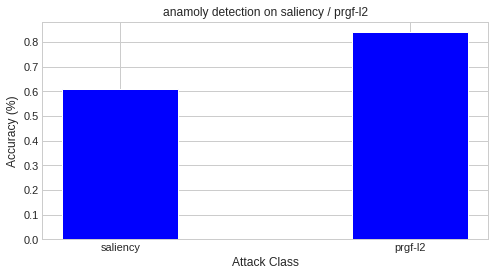

In [141]:
fig = plt.figure(figsize = (8, 4))
att_list = [attack_list[22], attack_list[23]]
plt.bar(att_list, known_class_acc[19:21], color ='blue', width = 0.4)
plt.xlabel("Attack Class")
plt.ylabel("Accuracy (%)")
plt.title("anamoly detection on " + att_list[0] + ' / ' + att_list[1])
plt.show()

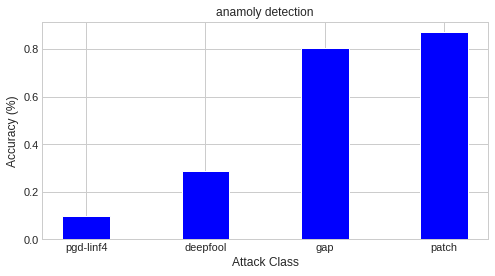

In [142]:
fig = plt.figure(figsize = (8, 4))
att_list = [attack_list[15], attack_list[16], attack_list[24], attack_list[9]]
plt.bar(att_list, unknown_class_acc, color ='blue', width = 0.4)
plt.xlabel("Attack Class")
plt.ylabel("Accuracy (%)")
plt.title("anamoly detection")
plt.show()

In [143]:
import csv
cnt = 0 
clean_class_acc = []
unknown_class_acc = []
clean_class_pval = []
unknown_class_pval = []

with open('./pretrain_mae_base_patch16_224/anamoly_detect.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if cnt > 24 and cnt <= 36:
            print('cls: ' + attack_dic[int(row[1])] + ' | acc: ' + row[3] +  ' | p_value: ' + row[5])
            clean_class_acc.append(float(row[3]))
            clean_class_pval.append(float(row[5]))
        elif cnt > 36:
            print('cls: ' + attack_dic[int(row[1])] + ' | acc: ' + row[3] +  ' | p_value: ' + row[5])
            unknown_class_acc.append(float(row[3]))
            unknown_class_pval.append(float(row[5]))
#         elif cnt >= 21 and cnt < 25:
#             unknown_class_acc.append(float(row[3]))
#             cls_idx = int(row[1].split('_')[0][3:])
#             print('cls: ' + attack_dic[cls_idx] + ' | acc: ' + row[3] +  ' | p_value: ' + row[5])
        cnt += 1

cls: clean | acc: 0.16129032258064516 | p_value: 0.41292316896844006
cls: clean | acc: 0.0967741935483871 | p_value: 0.47923418257964806
cls: clean | acc: 0.06451612903225806 | p_value: 0.46158448421997306
cls: clean | acc: 0.06451612903225806 | p_value: 0.4704591913047815
cls: clean | acc: 0.06451612903225806 | p_value: 0.47913446676970634
cls: clean | acc: 0.06451612903225806 | p_value: 0.4850176995562647
cls: clean | acc: 0.06451612903225806 | p_value: 0.49269581692177283
cls: clean | acc: 0.06451612903225806 | p_value: 0.49588672283990626
cls: clean | acc: 0.06451612903225806 | p_value: 0.49967592361768953
cls: clean | acc: 0.06451612903225806 | p_value: 0.5035648402054146
cls: clean | acc: 0.06451612903225806 | p_value: 0.5146332951089396
cls: clean | acc: 0.06451612903225806 | p_value: 0.5062571670738395
cls: patch | acc: 0.0967741935483871 | p_value: 0.44493194395971486
cls: patch | acc: 0.06451612903225806 | p_value: 0.46078675774043976
cls: patch | acc: 0.03225806451612903 | p

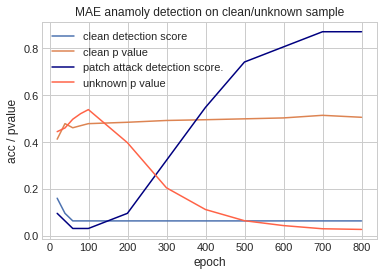

In [144]:
epoch = [19, 39, 59, 79, 99, 199, 299, 399, 499, 599, 699, 799]

plt.plot(epoch, clean_class_acc[:12], label = 'clean detection score')
plt.plot(epoch, clean_class_pval[:12], label = 'clean p value')

plt.plot(epoch, unknown_class_acc[:12], label = 'patch attack detection score.', color='navy')
plt.plot(epoch, unknown_class_pval[:12], label = 'unknown p value', color = 'tomato')

plt.legend()
plt.ylabel('acc / pvalue')
plt.xlabel('epoch')
plt.title('MAE anamoly detection on clean/unknown sample')
plt.show()

In [1]:
attack_dic = {0:'clean', 1:'fgsm-linf2', 2:'fgsm-linf8', 3:'fgsm-linf16-untar.', 4:'fgsm-linf16-tar.', 5:'hop-untar.', 6:'hop-tar.', 7:'hop-untar.', 8:'hop-tar.', 9:'patch', 
          10: 'universal-12', 11: 'universal-2', 12:'pgd-linf8', 13:'pgd-linf16',  14:'pgd-linf12',  15:'pgd-linf4',
         16:'deepfool', 17:'cw-linf16', 18:'cw-linf12',  19:'cw-linf8-tar.',  20:'cw-linf8-untar',  
          21:'cw-l2', 22:'saliency', 23:'prgf-l2',24:'gap'}

In [9]:
mae_sim_avg=  [0.79913642, 0.79740831, 0.81093306, 0.82654472, 0.8255853,  0.78068248,
 0.81487225, 0.79234256, 0.82406491, 0.72558636, 0.78273705, 0.80092655,
 0.80848918, 0.80865499, 0.80865162, 0.80151704, 0.76513198, 0.7824542,
 0.79674433, 0.7784361,  0.79057132, 0.78791865, 0.77173857, 0.80195233,
 0.79875525]

In [10]:

vit_sim_avg =  [0.61721215, 0.48992372, 0.10989521, 0.461451, 0.46427897 ,0.31470016,
 0.24115365, 0.35548879, 0.2275593 , 0.17878208 ,0.50834165, 0.50458129,
 0.4725272  ,0.32909197 ,0.40889489 ,0.49724426 ,0.4481803  ,0.42476556,
 0.47900547 ,0.4666006  ,0.46582644, 0.28372639, 0.50245221 ,0.26128471,
 0.469661  ]


In [11]:
import numpy as np

print(np.array(mae_ssim_avg).mean())
print(np.array(vit_ssim_avg).mean())

0.7952734212
0.3993051588


In [14]:
print('attack class | base-ViT | MAE-ViT')
for i in range(len(attack_dic)):
    print(attack_dic[i]+ ',' + str(vit_sim_avg[i]) + ',' + str(mae_sim_avg[i]))

attack class | base-ViT | MAE-ViT
clean,0.61721215,0.79913642
fgsm-linf2,0.48992372,0.79740831
fgsm-linf8,0.10989521,0.81093306
fgsm-linf16-untar.,0.461451,0.82654472
fgsm-linf16-tar.,0.46427897,0.8255853
hop-untar.,0.31470016,0.78068248
hop-tar.,0.24115365,0.81487225
hop-untar.,0.35548879,0.79234256
hop-tar.,0.2275593,0.82406491
patch,0.17878208,0.72558636
universal-12,0.50834165,0.78273705
universal-2,0.50458129,0.80092655
pgd-linf8,0.4725272,0.80848918
pgd-linf16,0.32909197,0.80865499
pgd-linf12,0.40889489,0.80865162
pgd-linf4,0.49724426,0.80151704
deepfool,0.4481803,0.76513198
cw-linf16,0.42476556,0.7824542
cw-linf12,0.47900547,0.79674433
cw-linf8-tar.,0.4666006,0.7784361
cw-linf8-untar,0.46582644,0.79057132
cw-l2,0.28372639,0.78791865
saliency,0.50245221,0.77173857
prgf-l2,0.26128471,0.80195233
gap,0.469661,0.79875525


In [127]:
import csv
path = 'pretrain_mae_base_patch16_224/mse_reconstruct.csv'

In [128]:
rows =  []
with open(path, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
print(len(data))

12


In [129]:
src_loss = data[0][1]
src_loss = src_loss[1:-1].split(',')
src_loss = [float(l.replace(' ', '')) for l in src_loss]
src_loss = src_loss[:31]
print(len(src_loss))

31


In [130]:
tar_15_loss = data[1][3]
tar_9_loss = data[2][3]
tar_16_loss = data[10][3]
tar_24_loss = data[11][3]

tar_15_loss = tar_15_loss[1:-1].split(',')
tar_15_loss = [float(l.replace(' ', '')) for l in tar_15_loss]

tar_9_loss = tar_9_loss[1:-1].split(',')
tar_9_loss = [float(l.replace(' ', '')) for l in tar_9_loss]

tar_16_loss = tar_16_loss[1:-1].split(',')
tar_16_loss = [float(l.replace(' ', '')) for l in tar_16_loss]

tar_24_loss = tar_24_loss[1:-1].split(',')
tar_24_loss = [float(l.replace(' ', '')) for l in tar_24_loss]

print(len(tar_15_loss))
print(len(tar_9_loss))
for r in range(1, len(rows)):
    print('tar class: ',rows[r][1])
    print('loss: ', rows[r][3])

31
31


In [131]:
###plot histogram on loss and sample
src_loss = np.array(src_loss)
src_loss = np.round(src_loss, 2)
print(src_loss.min(), src_loss.max())

src_bin_loss = np.zeros(100)
tar15_bin_loss = np.zeros(100)
tar9_bin_loss = np.zeros(100)
tar16_bin_loss = np.zeros(100)
tar24_bin_loss = np.zeros(100)

for s in src_loss: 
    src_bin_loss[int(s*100)] += 1 
for t in tar_15_loss: tar15_bin_loss[int(t*100)] += 1
for t in tar_9_loss: tar9_bin_loss[int(t*100)] += 1
for t in tar_16_loss: tar16_bin_loss[int(t*100)] += 1
for t in tar_24_loss: tar24_bin_loss[int(t*100)] += 1


0.55 0.68


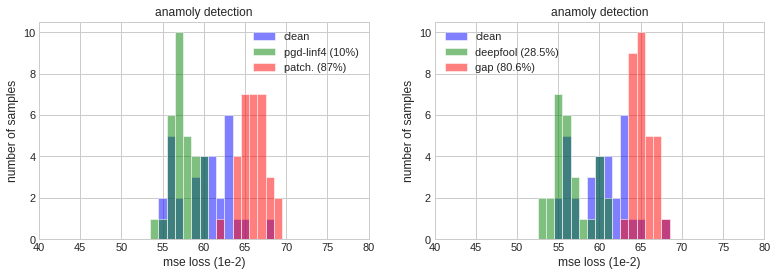

In [134]:
fig = plt.figure(figsize = (13, 4))
ax = fig.add_subplot(121)

plt.bar(np.arange(100), src_bin_loss, color ='blue', width= 1, alpha=0.5, label = 'clean')
plt.bar(np.arange(100), tar15_bin_loss,  color ='green', width = 1, alpha=0.5, label = 'pgd-linf4 (10%)')
plt.bar(np.arange(100), tar9_bin_loss,  color ='red', width = 1, alpha=0.5, label = 'patch. (87%)')
# plt.bar(np.arange(0,1,0.01), tar15_bin_loss, color ='red', lw = 0.01)
ax.set_xlabel("mse loss (1e-2)")
ax.set_xlim(40, 80)
ax.set_ylabel("number of samples")
plt.title("anamoly detection")
plt.legend()

ax = fig.add_subplot(122)

plt.bar(np.arange(100), src_bin_loss, color ='blue', width= 1, alpha=0.5, label = 'clean')
plt.bar(np.arange(100), tar16_bin_loss,  color ='green', width = 1, alpha=0.5, label = 'deepfool (28.5%)')
plt.bar(np.arange(100), tar24_bin_loss,  color ='red', width = 1, alpha=0.5, label = 'gap (80.6%)')
# plt.bar(np.arange(0,1,0.01), tar15_bin_loss, color ='red', lw = 0.01)
ax.set_xlabel("mse loss (1e-2)")
ax.set_xlim(40, 80)
ax.set_ylabel("number of samples")
plt.title("anamoly detection")
plt.legend()

plt.show()

In [108]:
fgsm_loss_list = []
for i in range(3, 7):
    fgsm_bin_loss = np.zeros(100)
    fgsm_loss = data[i][3]
    fgsm_loss = fgsm_loss[1:-1].split(',')
    fgsm_loss = [float(l.replace(' ', '')) for l in fgsm_loss]
    fgsm_loss = np.round(np.array(fgsm_loss), 2)
    for f in fgsm_loss: fgsm_bin_loss[int(f*100)] += 1
    fgsm_loss_list.append(fgsm_bin_loss)
    
print(fgsm_loss_list[0])
fgsm_loss_list.append()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1. 17.  4.  0.  6.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


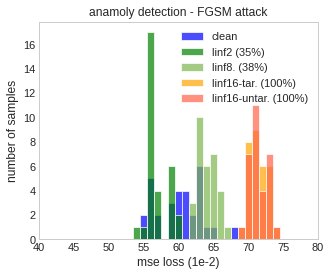

In [117]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_subplot(111)
my_cmap = plt.get_cmap("viridis")
print(my_cmap)
plt.bar(np.arange(100), src_bin_loss, color ='blue', width= 1, alpha=0.7, label = 'clean')
plt.bar(np.arange(100), fgsm_loss_list[0],  color ='green', width = 1, alpha=0.7, label = 'linf2 (35%)')
plt.bar(np.arange(100), fgsm_loss_list[1],  color ='#7eb54e', width = 1, alpha=0.7, label = 'linf8. (38%)')
plt.bar(np.arange(100), fgsm_loss_list[2],  color ='orange', width = 1, alpha=0.7, label = 'linf16-tar. (100%)')
plt.bar(np.arange(100), fgsm_loss_list[3],  color ='tomato', width = 1, alpha=0.7, label = 'linf16-untar. (100%)')

ax.set_xlabel("mse loss (1e-2)")
ax.set_xlim(40, 80)
ax.set_ylabel("number of samples")
plt.title("anamoly detection - FGSM attack")
plt.legend()
plt.grid(False)
plt.show()

In [113]:
pgd_loss_list = []
for i in range(7, len(data)):
    pgd_bin_loss = np.zeros(100)
    pgd_loss = data[i][3]
    pgd_loss = pgd_loss[1:-1].split(',')
    pgd_loss = [float(l.replace(' ', '')) for l in pgd_loss]
    pgd_loss = np.round(np.array(pgd_loss), 2)
    for f in pgd_loss: pgd_bin_loss[int(f*100)] += 1
    pgd_loss_list.append(pgd_bin_loss)
pgd_loss_list.append(tar15_bin_loss)
print(len(pgd_loss_list))

4


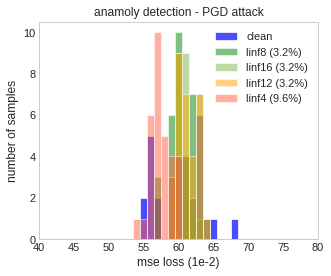

In [116]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_subplot(111)
my_cmap = plt.get_cmap("viridis")
print(my_cmap)
plt.bar(np.arange(100), src_bin_loss, color ='blue', width= 1, alpha=0.7, label = 'clean')
plt.bar(np.arange(100), pgd_loss_list[0],  color ='green', width = 1, alpha=0.5, label = 'linf8 (3.2%)')
plt.bar(np.arange(100), pgd_loss_list[1],  color ='#7eb54e', width = 1, alpha=0.5, label = 'linf16 (3.2%)')
plt.bar(np.arange(100), pgd_loss_list[2],  color ='orange', width = 1, alpha=0.5, label = 'linf12 (3.2%)')
plt.bar(np.arange(100), pgd_loss_list[3],  color ='tomato', width = 1, alpha=0.5, label = 'linf4 (9.6%)')

ax.set_xlabel("mse loss (1e-2)")
ax.set_xlim(40, 80)
ax.set_ylabel("number of samples")
plt.title("anamoly detection - PGD attack")
plt.legend()
plt.grid(False)
plt.show()